In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Reading in data from CSV
df = pd.read_csv("../data/cfb_attendance_DM.csv", encoding="cp1252")

In [3]:
#ascertain current data types
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               object
Results              object
Home Score            int64
Away Score            int64
Attendance          float64
Current Wins         object
Current Losses       object
Stadium Capacity      int64
Fill Rate           float64
New Coach            object
Tailgating           object
PRCP                float64
SNOW                 object
SNWD                 object
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                float64
Month               float64
Day                 float64
dtype: object

In [9]:
# Change column datatypes
df['Date'] = df['Date'].astype('datetime64')
df['Opponent'] = df['Opponent'].astype('string')
df['Site'] = df['Site'].astype('string')
df['TV'] = df['TV'].astype('string')
df['Home Score'] = df['Home Score'].astype('int32')
df['Away Score'] = df['Away Score'].astype('int32')

df.dtypes

Date                datetime64[ns]
Team                        object
Time                        object
Opponent                    string
Rank                        object
Site                        string
TV                          string
Result                      object
Results                     object
Home Score                   int32
Away Score                   int32
Attendance                 float64
Current Wins                object
Current Losses              object
Stadium Capacity             int64
Fill Rate                  float64
New Coach                   object
Tailgating                  object
PRCP                       float64
SNOW                        object
SNWD                        object
TMAX                         int64
TMIN                         int64
Opponent_Rank               object
Conference                  object
Year                       float64
Month                      float64
Day                        float64
Total Score         

In [10]:
#preview data
df.head()

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Results,Home Score,...,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day,Total Score
0,2000-09-02,Arkansas,20,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–0,W,38,...,0,0,105,65,NR,SEC,2000.0,9.0,2.0,38
1,2000-09-16,Arkansas,18,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–31,W,38,...,0,0,79,44,NR,SEC,2000.0,9.0,16.0,69
2,2000-09-23,Arkansas,20,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 28–21,W,28,...,0,0,85,63,NR,SEC,2000.0,9.0,23.0,49
3,2000-09-30,Arkansas,11,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 7–38,L,7,...,0,0,77,45,25,SEC,2000.0,9.0,30.0,45
4,2000-10-07,Arkansas,18,Louisiana–Monroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 52–6,W,52,...,0,0,50,28,NR,SEC,2000.0,10.0,7.0,58


In [11]:
#determine total score
total_score = df['Home Score'] + df['Away Score']
df['Total Score'] = total_score
df['Total Score']

0       38
1       69
2       49
3       45
4       58
        ..
6667    47
6668    51
6669    19
6670    80
6671    46
Name: Total Score, Length: 6672, dtype: int32

In [17]:
# Get a count of unique TV values
df['TV'].value_counts()

Not on TV                 1317
ESPN                       508
ESPN2                      460
ABC                        453
FSN                        403
                          ... 
BV                           1
ESPNU/ESPN 3D                1
CSN NE/Comcast Network       1
ELVN<U+2606>                 1
Versus/CSTV/mtn              1
Name: TV, Length: 245, dtype: Int64

In [13]:
# Split DataFrames into TV and non-TV
df_TV = df[df.TV != "Not on TV"]

df_no_TV = df[df.TV == "Not on TV"]

# Check if the counts of each DataFrame match the master DataFrame
if len(df) == len(df_TV) + len(df_no_TV):
    print("Checks out")
else:
    print("Does not check out")

Checks out


In [15]:
#format pyplot plots nicely
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [19]:
df_TV['TV'].value_counts()

ESPN                           508
ESPN2                          460
ABC                            453
FSN                            403
ESPN3                          398
                              ... 
CSN NE/Comcast Network           1
ELVN<U+2606>                     1
ARSN PPV                         1
CSNC/ESPN3                       1
Oceanic PPV/Campus Insiders      1
Name: TV, Length: 244, dtype: Int64

The average score when a CFB game is broadcast on TV is: 54.44126984126984
The average score when a CFB game is not broadcast on TV is: 54.10630220197418


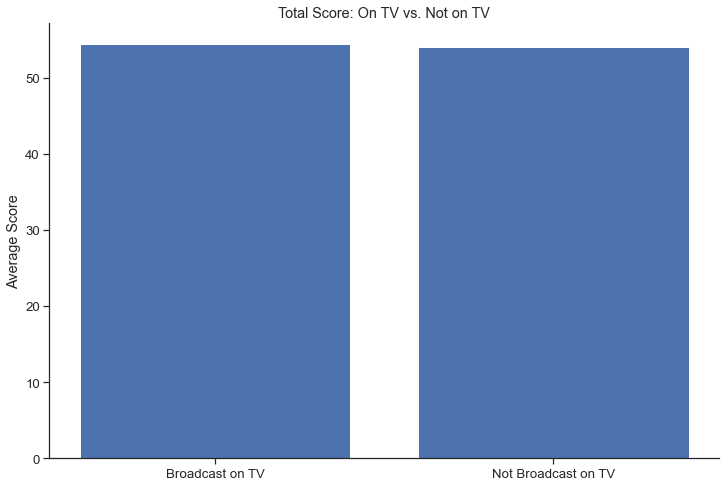

In [102]:
# Find the average scores for TV versus no TV
TV_average_score = df_TV['Total Score'].mean()

no_TV_average_score = df_no_TV['Total Score'].mean()

x_labels = ['Broadcast on TV', 'Not Broadcast on TV']
heights = [TV_average_score, no_TV_average_score]

print(f"The average score when a CFB game is broadcast on TV is: {TV_average_score}")
print(f"The average score when a CFB game is not broadcast on TV is: {no_TV_average_score}")

plt.bar(x_labels, heights);
plt.title('Total Score: On TV vs. Not on TV');
plt.ylabel('Average Score');

The average score for channel Index(['P12N', 'ESPN3', 'Other', 'ESPN2', 'FSN', 'BTN', 'ESPN', 'ESPN+',
       'ESPNU', 'ABC'],
      dtype='string', name='TV') is TV
P12N     62.223776
ESPN3    56.238693
Other    55.107193
ESPN2    54.586957
FSN      53.766749
BTN      53.655172
ESPN     53.143701
ESPN+    52.795053
ESPNU    52.422680
ABC      51.922737
Name: Total Score, dtype: float64


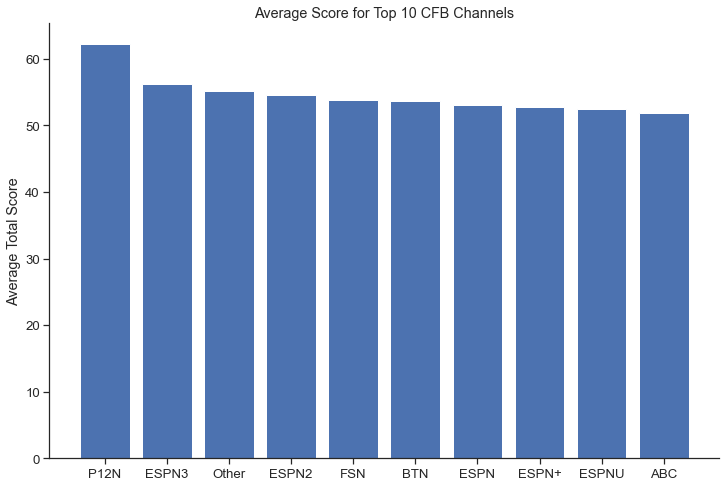

In [110]:
# Create a stripped down DataFrame with just TV station and total score
df_TV_basic = df_TV[['TV', 'Total Score']]

# Group by top 10 unqiue TV value's average total score, sort by total score
not_top10 = df_TV_basic.groupby('TV').sum().sort_values('Total Score', ascending=False).index[9:]

# Replace everything not in the top 10 with 'Other'
df_TV_replace  = df_TV_basic.replace(not_top10, 'Other')

# Group by TV again
df_TV_new = df_TV_replace.groupby('TV').mean()

df_TV_new = df_TV_new.sort_values('Total Score', ascending=False)

for score in df_TV_new:
    print(f"The average score for channel {df_TV_new.index} is {df_TV_new['Total Score']}")

plt.bar(df_TV_new.index, df_TV_new['Total Score']);
plt.title("Average Score for Top 10 CFB Channels");
plt.ylabel("Average Total Score");